# Statistical Modeling in Python

### Customization vs Rapid Development

As we know from (painful?) experience, Python is powerful because of its ability to leverage `numpy` and `scipy` to implement any statistical model from scratch. We can write the requisite matrix algebra, or the relevant likelihood function, and from there can optimize our model, calculate confidence intervals, and report the output of that model through data frames, lists, or printed tables. Building our own models is great! We get to build a model based on the exact context and assumptions of our problem, and therefore get exactly the model that we wanted. Unfortunately, it takes a LOT of time!

This lesson will provide our first exposure to pre-written statistical modeling in Python. We will be able to use only a couple of lines of code to implement complex and valuable statistical and machine learning models. Because the most costly asset in programming is the time that we spend debugging and writing code (running code is MUCH faster and cheaper than the time spent writing code), we are always looking for ways to avoid writing code that someone else has already written.

`statsmodels` is a library that covers the majority of regression models commonly used by economists and statisticians in other fields.

`sklearn` is an analogous library that covers machine learning models (aside from deep neural networks, which have their own implementations).

Each of these libraries is highly optimized to provide performant implementations of models that we use regularly, and allow us to avoid writing these models from scratch unless we need to customize our model for some specific use case! This is great news! You'll never have to think about writing your own linear or logistic regression from scratch again!

Let's dive in.


## Statsmodels

`statsmodels` makes statistics in Python easy! The library contains tools for regressions ranging from linear regression, to logistic regression, count regressions (negative binomial and poisson), various options for robust covariance measures, and tools to implement time series models as well! There are also really useful tools for assisting in creating our regression model based on any structure that best suits us.

We can import `statsmodels` in one of two ways:

1) With support for R-style formulas:

In [ ]:
import statsmodels.formula.api as sm

    /opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
      import pandas.util.testing as tm


This is probably the best way to import our data if we are doing regression analysis for causal inference. In these cases, we are not typically trying to make predictions as new data arrives, and so we do not need to have tools ready to analyze new data using our existing regression models.

2) Import `statsmodels` to use pre-built numpy arrays as inputs:

In [ ]:
import statsmodels.api as sm

In this case, we have other tools that we can use, but we need to manually arrange our `x` and `y` matrices. It looks clunky at first, but can be useful when we are building predictive pipelines using regression models, or when we might want to use both `statsmodels` and `sklearn` with the same data source.

Let's start with option 1...

### Preparing a Dataset

When using formulas, we prepare our dataset by importing the data into a Pandas `DataFrame`. We should take care that each of our variables has a name with
1) **No spaces**
2) No symbols
3) Made up of letters and numbers (also can't have a number as the first character)

Our code so far might look something like:

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd, numpy as np

data = pd.read_csv("https://github.com/dustywhite7/Econ8320/blob/master/AssignmentData/assignment8Data.csv?raw=true")

Assuming that our data set has already been cleaned. If our data has not yet been cleaned, then we need to clean our data prior to working with either `statsmodels` or `sklearn`. This is because regression AND machine learning models require that all information be provided in numeric format. We need to transform text-based data into categorical data (using either ordered numeric columns or binary variable columns generated from our categories), and ensure that all data is represented in the way that we want to use it within our model.

### Regression Equations

`statsmodels` incorporates `R`-style regression equations by using the `patsy` library behind the scenes. We will talk more about `patsy` soon. The pattern for regression equations is as follows:

```"dependent variable ~ independent variable + another independent variable + any other independent variables"```

The regression equation will be stored in a string (unlike in `R`), and we put our dependent variable (also called the endogenous variable, or outcome of interest) in the leftmost position within the string. We separate the dependent variable from all independent (exogenous or explanatory) variables using the `~` symbol. Then, each independent variable is separated from the others using `+` operators.

The reason is is so important that our column names be properly cleaned before implementing regression analysis is that spaces and other problematic formats for column names will cause problems with our regression equations.

### Implementing a Model

The first model we might try is a simple linear regression. These are the most common regression models, and typically what someone is referring to when they discuss "running a regression". The code is wonderfully simple:

In [ ]:
reg = smf.ols("hhincome ~ year", data=data).fit()
print(reg.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:               hhincome   R-squared:                      -0.000
    Model:                            OLS   Adj. R-squared:                 -0.000
    Method:                 Least Squares   F-statistic:                      -inf
    Date:                Wed, 16 Mar 2022   Prob (F-statistic):                nan
    Time:                        15:24:28   Log-Likelihood:            -1.7131e+05
    No. Observations:               13712   AIC:                         3.426e+05
    Df Residuals:                   13711   BIC:                         3.426e+05
    Df Model:                           0                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    Intercept      0.0188      0.000    138.414      0.000       0.019       0.019
    year          37.8564      0.274    138.414      0.000      37.320      38.392
    ==============================================================================
    Omnibus:                     9819.620   Durbin-Watson:                   1.027
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):           250725.793
    Skew:                           3.151   Prob(JB):                         0.00
    Kurtosis:                      22.978   Cond. No.                     9.31e+17
    ==============================================================================
    
    Warnings:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The smallest eigenvalue is 6.41e-26. This might indicate that there are
    strong multicollinearity problems or that the design matrix is singular.


    /opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
      return self.ess/self.df_model


When we run these two lines of code, we are creating, fitting, and reporting on a regression model! It's fast, it's clean, and it's really easy to implement! `sm.ols` is the OLS class of regression models, and takes two required arguments: a regression equation (passed as a string), and a data source (expected to be a `pandas.DataFrame` object). We use the `.fit()` method to complete all of the math that actually solves our regression model. When we call `.summary()` on a fitted regression, we get a printout of the regression summary tables for the model, complete with diagnostic measures, estimates of our beta coefficients, and confidence intervals!

If the model is satisfactory, then we are done! (It really is that simple!)

If I want to keep iterating on my model, I might want to try regressing year on the logged average household incomes:

In [ ]:
reg = smf.ols("np.log(hhincome) ~ year", data=data[data['hhincome']>0]).fit()
print(reg.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:       np.log(hhincome)   R-squared:                      -0.000
    Model:                            OLS   Adj. R-squared:                 -0.000
    Method:                 Least Squares   F-statistic:                      -inf
    Date:                Wed, 16 Mar 2022   Prob (F-statistic):                nan
    Time:                        15:31:18   Log-Likelihood:                -17363.
    No. Observations:               13653   AIC:                         3.473e+04
    Df Residuals:                   13652   BIC:                         3.474e+04
    Df Model:                           0                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    Intercept   2.698e-06   1.82e-09   1481.190      0.000    2.69e-06     2.7e-06
    year           0.0054   3.67e-06   1481.190      0.000       0.005       0.005
    ==============================================================================
    Omnibus:                     5172.537   Durbin-Watson:                   1.277
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63678.616
    Skew:                          -1.469   Prob(JB):                         0.00
    Kurtosis:                      13.164   Cond. No.                     8.12e+17
    ==============================================================================
    
    Warnings:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The smallest eigenvalue is 8.4e-26. This might indicate that there are
    strong multicollinearity problems or that the design matrix is singular.


    /opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
      return self.ess/self.df_model


As you can see from the code above, everything is the same, except that we were able to transform household income using `np.log` on the go! We don't even need to create a new column! We can just do it inside of our regression model! We also subset our data so that the log operator doesn't break our model by introducing $-\infty$ as a possible `hhincome` value.

In other cases, it might be useful to create state-level fixed effects by including dummy variables for the states in our `statefip` column. Note that this won't work with our current data, since we only have one state in our data set.

In [ ]:
reg = smf.ols("np.log(hhincome) ~ year + C(statefip)", data=data[data['hhincome']>0]).fit()
print(reg.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:       np.log(hhincome)   R-squared:                      -0.000
    Model:                            OLS   Adj. R-squared:                 -0.000
    Method:                 Least Squares   F-statistic:                      -inf
    Date:                Wed, 16 Mar 2022   Prob (F-statistic):                nan
    Time:                        15:32:19   Log-Likelihood:                -17363.
    No. Observations:               13653   AIC:                         3.473e+04
    Df Residuals:                   13652   BIC:                         3.474e+04
    Df Model:                           0                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    Intercept   2.698e-06   1.82e-09   1481.190      0.000    2.69e-06     2.7e-06
    year           0.0054   3.67e-06   1481.190      0.000       0.005       0.005
    ==============================================================================
    Omnibus:                     5172.537   Durbin-Watson:                   1.277
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63678.616
    Skew:                          -1.469   Prob(JB):                         0.00
    Kurtosis:                      13.164   Cond. No.                     8.12e+17
    ==============================================================================
    
    Warnings:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The smallest eigenvalue is 8.4e-26. This might indicate that there are
    strong multicollinearity problems or that the design matrix is singular.


    /opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
      return self.ess/self.df_model


The `C()` command indicates that we would like to consider the `statefip` variable as a **C**ategorical variable, not a numeric variable. We can transform ANY column using the categorical operator. It is most useful when a column is text-based, or when a column is numeric but should not be treated as a count, ordinal, or continuous variable. We CAN use it on our dependent variable, but this will (unless our dependent variable was binary text data) break our regression model, which expects only a single dependent variable, rather than an array of dependent variables.

Sometimes we want to include transformed variables in our model without creating a new column. The `I()` operator allows us to do just that:

In [ ]:
# Square a variable using the I() function for
#   mathematical transformations
reg = smf.ols("np.log(hhincome) ~ age + I(age**2)", data=data).fit()

In this case, we transform `age` by squaring it (maybe in preparation to create an age-earnings profile?). One line, simple syntax, what could be better?

In [ ]:
# Combine variables using the I() function for
#   mathematical transformations
reg = smf.ols("np.log(hhincome) ~ I(age-education-5)", data=data).fit()

This example combines TWO columns to create a new measure (proxying experience by subtracting education from age, and subtracting an additional 5 years). All we have to do is describe the relationship that we want to model as an explanatory variable, and we are off to the races! Most operators are fair game, and we can include an arbitrary number of columns in our measure calculation.

### More robust modeling

If we want to utilize robust standard errors, we can easily update our regression results:

In [ ]:
reg = smf.ols("np.log(hhincome) ~ year + C(statefip)", data=data).fit()
# Use White's (1980) Standard Error
reg.get_robustcov_results(cov_type='HC0')
print(reg.summary())

Or, if we want to cluster our standard errors by state,

In [ ]:
reg = smf.ols("np.log(hhincome) ~ year + C(statefip)", data=data).fit()
# Use Cluster-robust Standard Errors
reg.get_robustcov_results(cov_type='cluster', groups=data['statefip']) # Need to specify groups
print(reg.summary())

We don't have to stick to just `HC0` and cluster-robust standard errors. Below are some of the [covariance options](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.get_robustcov_results.html) that we have:
1) `HC0`: White's (1980) Heteroskedasticity robust standard errors
2) `HC1`, `HC2`, `HC3`: MacKinnon and White's (1985) alternative robust standard errors, with `HC3` being designed for improved performance in small samples
3) `cluster`: Cluster robust standard errors
4) `hac-panel`: Panel robust standard errors

We should choose the standard errors that best fit our specific data needs, and it is important to realize that this choice is highly context-dependent. The structure and nature of our data should be carefully considered, as should the specific regression model that we are trying to implement.

### Time Series Models

Not only can we model linear regression, we also have multiple time series options available. We won't go into much detail, since each of these models deserve to have significant time devoted to them, and we just don't have the time in this class.

- [ARIMA](http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMA.html) models
- [VAR](http://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VAR.html) models
- [Exponential Smoothing](https://www.statsmodels.org/stable/tsa.html#exponential-smoothing) models

We can run an ARIMA, for example, using code like the following example:

In [ ]:
# This won't work unless we have multiple years of data (which we currently don't)

from statsmodels.tsa.arima_model import ARIMA

y = data.loc[data['statefip']==31, ['hhincome','year']]
y.index=pd.to_datetime(y.year)
reg = ARIMA(y['hhincome'], order=(1,1,0)).fit()
print(reg.summary())

### Modeling Discrete Outcomes

If we have a [binary dependent variable](https://www.statsmodels.org/devel/discretemod.html), we are able to use either [Logit](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit) or [Probit](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.Probit.html#statsmodels.discrete.discrete_model.Probit) models to estimate the effect of exogenous variables on our outcome of interest. To fit a Logit model:

In [ ]:
import statsmodels.api as sm

myformula="married ~ hhincome + C(statefip) + C(year) + educ"
model= sm.Logit.from_formula(myformula, data=data).fit()

### Modeling Count Data

When modeling count data, we have options such as [Poisson](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Poisson.html#statsmodels.discrete.discrete_model.Poisson) and [Negative Binomial](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.NegativeBinomial.html#statsmodels.discrete.discrete_model.NegativeBinomial) models.

In [ ]:
data = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/DataSets/auto-mpg.csv")

myformula="nchild ~ hhincome + C(statefip) + C(year) + educ + married"

model= sm.Poisson.from_formula(myformula, data=data).fit()

There are many other regression "flavors", and the best way to learn about what is available through `statsmodels` is to [read the docs](https://www.statsmodels.org/stable/user-guide.html).

## The `patsy` library

We have been using regression equations in `statsmodels` a lot without really discussing what is happening behind the scenes. `statsmodels` relies on a library called `patsy` to parse regression equations and prepare our data for regression analysis. While `statsmodels` does a great job of incorporating the `patsy` library for us, this isn't always the case. In fact, it is a really valuable tool in many other contexts (think machine learning or deep learning).


### Why use `patsy`?

We don't necessarily have to use `patsy`. We could just select our variables manually. Creating a column of ones to serve as our intercept column is trivial (you of course remember that from the linear regression assignment). `patsy` is a tool for creating a standardized pipeline to deal with data that is stored in identical formats, and aids us in creating reusable or replicable code. Patsy allows us to separate our endogenous and exogenous variables AND to
	- "Dummy out" categorical variables
	- Easily transform variables (square, or log transforms, etc.)
	- Use identical transformations on future data
    
Even better, `patsy` is just as easy to use as regression equations. We just need to learn about the function wrappers that are necessary to create our processed data:

In [ ]:
import patsy as pt
import pandas as pd
import numpy as np

data = pd.read_csv("https://github.com/dustywhite7/Econ8320/blob/master/AssignmentData/assignment8Data.csv?raw=true")

# To create y AND x matrices
y, x = pt.dmatrices("hhincome ~ year + educ + married + age", data = data)

In order to get started, we need to import `patsy`, and we typically give it the two-letter abbreviation `pt`. Once we have imported our data, we use the `pt.dmatrices` function. This function takes a regression equation (again, as a string), and a data source. The returned value is a **tuple** of `y` and `x`. We can break that tuple into two values by using the `y, x = ...` syntax, so that we have a `y` array and an `x` array.

We don't have to create BOTH `y` and `x` data, though! We can use the `pt.dmatrix` function to just create an `x` matrix. Maybe we already have a dependent variable, and want to try out variations on our explanatory variables to see how each performs. In this case, our regression equation should have no column name to the left of the `~` symbol:

In [ ]:
# To create ONLY an x matrix
x = pt.dmatrix("~ year + educ + married + age", data = data)

One more note is that these regression equations automatically include an intercept term. If you do NOT want an intercept term (some regression models and most machine learning models don't use them), then you can add `-1` as an exogenous variable in your regression equation, in order to indicate that you want to eliminate the column of ones that make up the intercept column in our matrix of exogenous regressors.

### Categorical Variables

Again, we have the functions described in the regression section above available to us as we transform our data. We can create categorical variables:

In [ ]:
# To create y AND x matrices
eqn = "hhincome ~ C(year) + educ + married + age"
y, x = pt.dmatrices(eqn, data = data)

And (again) we can transform variables!

In [ ]:
# To create y AND x matrices
eqn = "I(np.log(hhincome)) ~ C(year) + educ + married + age + I(age**2)"
y, x = pt.dmatrices(eqn, data = data)

We can also use interaction operators. `*` will interact each value of two columns, and also include the original columns in the regression model. `:` will include only the interaction terms, while omitting the original columns. Check out the [explanation of formulas](https://patsy.readthedocs.io/en/latest/formulas.html) for more details.


### SUPER IMPORTANT $\rightarrow$ Same Transformation on New Data!

Often, we will want to build a model with observed data that can make predictions about new observations as those observations are recorded. `patsy` provides a simple function to take the structure of one exogenous matrix and generate another identically structured matrix using new data:

In [ ]:
# To create a new x matrix based on our previous version
xNew = pt.build_design_matrices([x.design_info], dataNew)

In other words, we can create a new matrix in the SAME SHAPE as our original `x` matrix by using the `build_design_matrices()` function in `patsy`.

We pass a list containing the old design matrix information (because we can actually create many matrices simultaneously), as well as the new data from which to construct our new matrix.

Why does recreating our `x` array matter? This process ensures that we always have the same number of categories in our categorical variables. A new, smaller subset of data that is freshly observed may not contain observations of every category, in which case an updated patsy matrix would not contain the correct number of columns! We are able to maintain consistency in our model, making our work replicable. Most importantly, this will streamline the use of `statsmodels` and `sklearn` in the same workflow!

Speaking of `sklearn`...

## `sklearn`

What `statsmodels` does for regression analysis, `sklearn` does for predictive analytics and machine learning. It is a truly fabulous library. `sklearn` is likely the most popular machine learning library, and has a standard API to make using the library VERY simple. Even better, it's documentation is some of the nicest documentation you will find anywhere, and contains incredible detail about how to implement models, as well as lessons about the "how" and "why" of using each model. You couldn't write a better textbook about machine learning than the documentation for `sklearn`.

Below, we will briefly discuss some of the models that are most commonly utilized from `sklearn`. Details will be sparse. We are mostly focused on the code implementation of these models. More detail on how machine learning models work is provided in  Business Forecasting, and is outside the scope of this course.

### Decision Tree Classification (and Regression)

[Classification](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and [Regression](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) Trees (CARTs) are the standard jumping-off point for exploring machine learning. They are very easy to implement in `sklearn`:

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas as pd
import patsy as pt

data = pd.read_csv("https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/roomOccupancy.csv")

y, x = pt.dmatrices("Occupancy ~ CO2", data=data)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y.squeeze())

pred = clf.predict(x)

print("In-sample accuracy: {}".format(accuracy_score(y.squeeze(), pred)))

    In-sample accuracy: 0.9753162225224119


### Support Vector Machines

We also implement [Support Vector Machines](http://scikit-learn.org/stable/modules/svm.html#svm) for both [classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [regression](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR):

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()
clf = clf.fit(x, y.squeeze())

pred = clf.predict(x)

print("In-sample accuracy: {}".format(accuracy_score(y.squeeze(), pred)))

    /opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
      "avoid this warning.", FutureWarning)


    In-sample accuracy: 0.9397028122313643


Can you see the API pattern yet?

### Random Forest Models

Again, available in both [classification](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) and [regression](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) flavors, these models are aggregations of many randomized Decision Trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(x, y.squeeze())

pred = clf.predict(x)

print("In-sample accuracy: {}".format(accuracy_score(y.squeeze(), pred)))

    In-sample accuracy: 0.9748250030701215


There MUST be a pattern here...

Of course there is! We import our classifier (or regressor), then create an instance of that object. We can name it `clf` or anything else that we prefer. From there, the process is the same:
- Use the `.fit()` method, passing in the relevant data for our context
- Create predictions using our fitted model with `.predict()` and new exogenous data (or the old data to test in-sample fit)
- Measure the performance of our model with `accuracy_score`, or any other metric that can describe performance given a specific use case

### More from `sklearn`

Many other tools are also available to aid in the data cleaning process through `sklearn`. Some of these are:

- [Principal Component Analysis (PCA)](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
- [Factor Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis)
- Many [Cross-Validation Algorithms](http://scikit-learn.org/stable/modules/cross_validation.html)
- [Hyperparameter Tuning](http://scikit-learn.org/stable/modules/grid_search.html)
   - Finding the correct parameters for a decision tree or random forest, for example
- [Model Evaluation Tools](http://scikit-learn.org/stable/modules/model_evaluation.html)
- [Plotting decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree)


## Solve-it!

Using the wage data provided here (https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/wagePanelData.csv), create a linear regression model to explain and/or predict wages. Your data set should be labeled `data` and your fitted model should be stored as `reg`. If you do not name the model correctly, you won't get any points!

Please put all your code for this exercise in the cell labeled `#si-linear-regression` file found below.

In [3]:
#si-linear-regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data_url = "https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/wagePanelData.csv"
data = pd.read_csv(data_url)

# Separate features (X) and target variable (y)
X = data[['years_experience', 'weeks_worked', 'occupation_code', 'industry_code', 'south_region',
          'metropolitan_resident', 'ms', 'female', 'union_member', 'education', 'is_black']]
y = data['log_wage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
y_pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_train)

y_pred_test = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_test)

# Store the model as 'reg'
reg = reg


Train MSE: 0.12578493498476773
Test MSE: 0.1354686828872411


## Solve-it!

Import the pass/fail data for students in Portugal found here(https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/passFailTrain.csv), and create a logistic regression model
using `statsmodels` that can estimate the likelihood of students passing or failing class. The dependent variable is contained in the column called `G3`, which takes the value `1` when the student has a passing final grade, and `0` otherwise.

Call your fitted model `reg`, and place all code for this exercise in the cell labeled `#si-logistic-regression` file found below.

                 sex       age      Medu      Fedu  traveltime  studytime  \
sex         1.000000 -0.004784  0.061046  0.018583    0.085402  -0.335365   
age        -0.004784  1.000000 -0.169321 -0.199775    0.014287   0.019726   
Medu        0.061046 -0.169321  1.000000  0.623016   -0.154097   0.022680   
Fedu        0.018583 -0.199775  0.623016  1.000000   -0.138288  -0.058836   
traveltime  0.085402  0.014287 -0.154097 -0.138288    1.000000  -0.098772   
studytime  -0.335365  0.019726  0.022680 -0.058836   -0.098772   1.000000   
failures    0.061853  0.246618 -0.232839 -0.265285    0.101586  -0.128480   
famrel      0.077867  0.027571 -0.026791 -0.053632    0.068207   0.105700   
freetime    0.227824  0.021787 -0.000802 -0.045351    0.022477  -0.167908   
goout       0.126029  0.107804  0.089601  0.022057    0.080075  -0.132103   
Dalc        0.283855  0.111593  0.006075  0.001026    0.146023  -0.231598   
Walc        0.328193  0.077371 -0.021256  0.005189    0.151659  -0.304432   

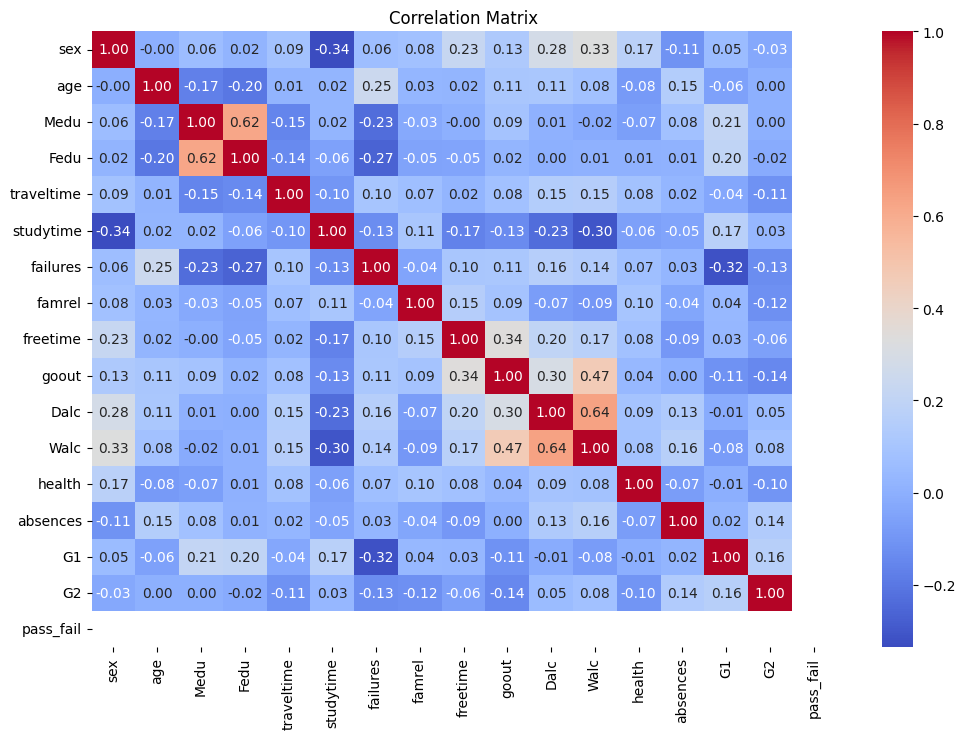

In [5]:
#si-logistic-regression

# Calculate correlation matrix
correlation_matrix = data[['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                           'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'pass_fail']].corr()

# Print correlation matrix
print(correlation_matrix)

# Visualize correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Solve-it!

Use the data on NFL franchise values included in the NFL Valuation data source (https://raw.githubusercontent.com/dustywhite7/Econ8320/master/AssignmentData/assignment12Data.csv) file to implement a Random Forest Classifier in sklearn using 100 trees to predict team-years when `Playoffs` takes the value `1` (when a team made the playoffs in that season).

- Use Patsy to create `x2` and `y2` matrices
- Create the classifier
- Fit the classifier, and store the fitted model with the name `playoffForest`

Place all code for this exercise in the cell labeled `#si-random-forest` file found below.

In [2]:
#si-random-forest
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import patsy as pt
from sklearn.ensemble import RandomForestClassifier

# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/dustywhite7/Econ8320/master/AssignmentData/assignment12Data.csv")

# Create a new column 'log_wage' by taking the natural logarithm of the 'Value' column
data['log_wage'] = np.log(data['Value'])

# Define the regression model using 'log_wage' as the dependent variable
reg = smf.ols("log_wage ~ Year + Revenues + OperatingIncome", data=data).fit()

# Use Patsy to create 'x2' and 'y2' matrices for the Random Forest Classifier
y2, x2 = pt.dmatrices("Playoffs ~ Year + Revenues + OperatingIncome", data=data)

# Create the Random Forest Classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)

# Fit the classifier and store the fitted model with the name playoffForest
playoffForest = clf.fit(x2, np.asarray(y2).ravel())

# Print the summary of the regression model
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1024.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          3.37e-221
Time:                        04:23:14   Log-Likelihood:                 160.70
No. Observations:                 539   AIC:                            -313.4
Df Residuals:                     535   BIC:                            -296.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -114.7304      5.123    -